In [1]:
from StaticsSolverV3 import *
import inspect

In [6]:
'''
              P
             \|/
A_________________C
^             B   ^
\\                O
 |------------|---|
       L1       L2
'''

'''
 y
 |__x
 /
z
'''

# Given
PM =   10   #N
L1 =   12   #m
L2 =    2   #m
r = 0.004   #m
Sy =  340*10**6   #Pa

load = Load(lambda x: 5,(0,0,0),(5,0,0),Load.Y)
load.getForce((0,0,0),(5,0,0)).disp()

# Define geometry
A = (0,0,0)
B = (L1,0,0)
C = (L1+L2,0,0)

# Define acting forces
P = Vector('c',0,-PM,0,B)
L = load.getForce(load.start,load.end)

# Define variable form reaction forces
A_x,A_y,C_y = symbols('A_x A_y C_y')
F_A = Vector('c',A_x,A_y,0,A)
F_C = Vector('c',0,C_y,0,C)

# Sum forces and moments
F_net = sumForces([P,L,F_A,F_C])
M_net = sumMoments(A,[P,L,F_A,F_C],[])

# Solve for reaction force components
u = solve([F_net.x,F_net.y,M_net.z],[A_x,A_y,C_y],show=True)
Ax,Ay,Cy = [v[0] for v in u]
FA = Vector('c',Ax,Ay,0,A)
FC = Vector('c',0,Cy,0,C)

<0,25.0,25.0> @ (2.5,0,0)
A
 [[ 1.  0.  0.]
 [ 0.  1.  1.]
 [ 0.  0. 14.]]

B
 [[  0. ]
 [-15. ]
 [ 57.5]] 

[ 1.0    0.0    0.0]     [A_x]     [  0.0]
[ 0.0    1.0    1.0]  *  [A_y]  =  [-15.0]
[ 0.0    0.0   14.0]     [C_y]     [ 57.5]


[A_x]     [   0.0]
[A_y]  =  [-19.1071]
[C_y]     [4.1071]


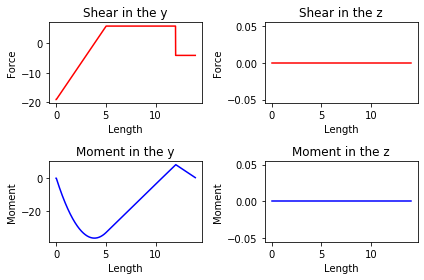

In [7]:
# Shear moment diagrams
x,vy,My,vz,Mz = shearMomentDiagram([load],[P,FA,FC],[],A,C,axis=1)

In [8]:
# Stress in a beam:
#    sig_x  = My/I
#    sig_xy = VQ/It
#    where x is in the direction of the length of the beam, and y is the direction of the shear forces

# Point of Interest, I, Q
poi = My.index(max(My))
I = 1/4 * np.pi * r**4
Q = 1/2 * np.pi * r**3

# In the y:
sigY_x = -My[poi]*r/I
sigY_xy = vy[poi]*Q/(I*2*r)

# In the z:
sigZ_x = -Mz[poi]*r/I
sigZ_xz = vz[poi]*Q/(2*r*I)

# In total:
sig_xx = sigY_x + sigZ_x
sig_xy = sigY_xy
sig_xz = sigZ_xz

sig = [[sig_xx,sig_xy,sig_xz],
       [sig_xy,0,0],
       [sig_xz,0,0]]

prin_str = list(np.linalg.eigvals(sig))
prin_str.sort(reverse=True)
sig1,sig2,sig3 = prin_str

tau_max = abs(sig1-sig3)/2

N = Sy/tau_max

print("tau_max = {} MPa".format(round(tau_max*10**-6,4)))
print("N = {}".format(round(N,4)))

tau_max = 82.4219 MPa
N = 4.1251
